# A Cholera Outbreak in London

__In this notebook__, we will test two proposed explanations (hypotheses) of how cholera spread in London: through the **air** and through the **water**. That is, we will show that some hypotheses are likely a better fit for the data and are harder to reject, in a ***statistically significant*** way, than others. 

<br>

<table><tr>
    <td> <img src="../imgs/king_cholera.png" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>

<br>



## The Theories

Two predominant theories on the cause of cholera existed at the the time:

<img align="right" width="300" height="300" src='../imgs/airborne.png'> 

### Airborne

Inhalation of a poison given off by dead or contaminated organic matter like sewage which enters the body through the lungs and poisons the blood. 

<img align="right" width="300" height="300" src='../imgs/waterborne.png'>

### Waterborne

Ingestion of “excretions of the sick” which contain a living organism which infects the gastrointestinal system.

<img align="right" width="300" height="300" src='../imgs/john_snow.jpg'>

## The Doctor

* Known for pioneering anesthesia techniques
* Noticed that cholera affected the gastrointestinal system
* Hypothesized that contaminated drinking water was the cause of cholera
* Most people disagreed with him

## The Outbreak

In the late summer of 1849, a particularly bad outbreak of cholera struck the Soho neighborhood in central London. Between August 31 and September 10, over 500 people had died. By the end of the outbreak, the death toll was 616.

<img align="right" height="300" width="500" src = '../imgs/soho_map.jpeg'>

## The Map

* John Snow collected data for each household including the number of deaths from cholera
* Each death is represented as a black line

<img align="right" width="400" src = '../imgs/broad_street.png'>

## The Pump

* John Snow centered his map on a particular water pump that he suspected to be the source of the ourbreak.
* The pump was located on Broad Street.

<img align="right" width="400" src = '../imgs/broad_sewers.png'>

## The Sewers

* However, the neighborhood also had many sewers.
* Sewers were thought to be a source of cholera by many supporters of the airborne theory.
* Sewers are represented as squares in the map to the right.




## The Data

People in charge of the city’s sewers went door-to-door in the Soho neighborhood to assess the claim that toxic fumes from its sewers were causing the deaths. We have digitized this data into a .csv file that has the following columns: 

- **house_ID:** unique indtifier for the house
- **deaths:** the total deaths in that particular house 
- **dis_sewers:** distance (in meters) from the house to the nearest sewer (1 meter = 3.3 feet)
- **dis_bspump:** distance (in meters) from the house to the Broad St. pump

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

house_data = pd.read_csv('../data/deaths_by_house.csv')
house_data

,house_ID,deaths,dis_sewers,dis_bspump
0,1,0,10.08,125.00
1,2,1,14.64,119.94
2,3,0,18.47,116.27
3,4,0,22.98,112.56
4,5,0,27.47,109.10
...,...,...,...,...
1847,1848,0,22.11,191.88
1848,1849,0,4.75,197.54
1849,1850,0,18.06,261.31
1850,1851,0,6.00,286.47


## Our Own Data Experiment

In the case of the airborne and waterborne theories, we can separate people into groups. The exposed group (people living near a sewer or the water pump) is often called an **impact** or **treatment group** while the unexposed group (people living far from a sewer or the water pump) is the **control group**. When testing the airborne theory, we will group people based on whether they lived near a sewer or not and whether they died of cholera or not. When testing the waterborne theory, we will group people based on whether they lived near a certain water pump or not and whether they died of cholera or not. 

This will result in four groups for each proposed explanation. We will place them in a 2x2 **contingency table** (also called a ***two-way table*** or ***crosstab***). We will have to test each explanation separately. In all, that means four contingency tables: an expected (null) and an observed table for each of the two hypotheses.

## The Airborne Hypothesis: Investigating the Sewers

Now that we've talked about how to set up our experiment, let's apply this to the cholera data! 

The first theory we will explore assumes that cholera is airborne and that people get infected by inhaling toxic fumes from localized sources. In this case, the source is fumes emitted from sewers. 

<table><tr>
    <td> <img src="../imgs/sewer.jpeg" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

If this theory was true, then closer proximity to sewers would make it more likely to inhale the toxic air and contract cholera. For simplicity, let us assume someone is 'close' to a sewer if they less than 40 feet (12.2 meters) from one... otherwise they are 'far'. Unfortunately, we don't have the total number of people in each house. That data was not collected.  Therefore, we will have to count houses instead of people.

Here is the contingency table for the airborne theory with totals along the bottom and right side:

<img src="../imgs/sewer_contingency.jpeg" style="width: 800px;"/>


### Predict

Even though we will test the airborne theory by assuming the null hypothesis is true. If there was support for the alternative hypothesis (There is an association between proximity to a sewer and cholera), what do you predict the observed contingency table will look like? In other words, which of the four groups will have more counts than others?


### Calculating Values

A lot of data will go into our contingency tables. Let's calculate that data and put into variables. This includes:

- total houses with a death from cholera: `total_deaths`
- total houses without a death from cholera: `total_nondeaths`
- total houses near a sewer: `total_near_sewer`
- total houses far from a sewer: `total_far_sewer`
- total number of houses: `total_houses`

In [2]:
total_deaths = sum(house_data['deaths'] >= 1)
print(total_deaths)

369


In [3]:
total_nondeaths = sum(house_data['deaths'] == 0)
print(total_nondeaths)

1483


In [4]:
total_near_sewer = sum(house_data['dis_sewers'] <= 12.2)
print(total_near_sewer)

553


In [5]:
total_far_sewer = sum(house_data['dis_sewers'] > 12.2)
print(total_far_sewer)

1299


In [6]:
total_houses = total_near_sewer + total_far_sewer
print(total_houses)

1852


We can summarize our data using the following code:

In [7]:
print(f"Number of houses with a death: {total_deaths}")
print(f"Number of houses without a death: {total_nondeaths}")
print(f"Number of houses near a sewer: {total_near_sewer}")
print(f"Number of houses far from a sewer: {total_far_sewer}")
print(f"Total number of houses: {total_houses}")

Number of houses with a death: 369
Number of houses without a death: 1483
Number of houses near a sewer: 553
Number of houses far from a sewer: 1299
Total number of houses: 1852


### Building the Null Contingency Table

We now need to construct the contingency table under the null hypothesis (the green boxes). In other words, **how many deaths and nondeaths we would expect if there was no relationship between sewers and cholera**.

We can automate the calculation for each of the four groups using the following equation:

$$expected \ value = {row \ total \times column \ total \over grand \ total}$$



<img src="../imgs/sewer_contingency.jpeg" style="width: 800px;"/>

In [8]:
exp_near_sewer_deaths = int(total_deaths * total_near_sewer / total_houses)

In [9]:
exp_near_sewer_nondeaths = int(total_nondeaths * total_near_sewer / total_houses)

In [10]:
exp_far_sewer_deaths = int(total_deaths * total_far_sewer / total_houses)

In [11]:
exp_far_sewer_nondeaths = int(total_nondeaths * total_far_sewer / total_houses)

In [12]:
print(f"Expected houses near a sewer with a death: {exp_near_sewer_deaths}")
print(f"Expected houses near a sewer without a death: {exp_near_sewer_nondeaths}")
print(f"Expected houses far from a sewer with a death: {exp_far_sewer_deaths}")
print(f"Expected houses far from a sewer without a death: {exp_far_sewer_nondeaths}")

Expected houses near a sewer with a death: 110
Expected houses near a sewer without a death: 442
Expected houses far from a sewer with a death: 258
Expected houses far from a sewer without a death: 1040


**Run the following code to build a blank contingency table.**

In [13]:
# Now let's put it all together into a contingency table with the following shape! 

def visualize_contingency_table(contingency_table, top_labels, left_labels):
    # print("\t\t  Close | Far ")
    print('{:<15s} {:<15s} {:<20s}'.format(top_labels[0], top_labels[1], top_labels[2]))

    i = 0
    for line in contingency_table:
        print('{:<15s} {:<15d} {:<20d}'.format(left_labels[i], contingency_table[i][0], contingency_table[i][1]))
        i += 1
    
top_labels = [" ", "Near Sewer", "Far from Sewer"]
left_labels = ["Deaths", "Non Deaths", "Total"]


**Run the following code to insert our data in the table and display it.**

In [14]:
contingency_table = [
    [exp_near_sewer_deaths, exp_far_sewer_deaths],
    [exp_near_sewer_nondeaths, exp_far_sewer_nondeaths]
] 

print("Expected (Null) Contingency Table:")
visualize_contingency_table(contingency_table, top_labels, left_labels)

Expected (Null) Contingency Table:
                Near Sewer      Far from Sewer      
Deaths          110             258                 
Non Deaths      442             1040                


### Building the Observed Contingency Table

We will now build another contingency table for what was actually observed during the outbreak. Instead of calculating the row and column totals, we can simply calculate each of the four green boxes in the table.

<img src="../imgs/sewer_contingency.jpeg" style="width: 800px;"/>

**Houses that were near a sewer and had people that died of cholera.**

In [15]:
obs_near_sewer_deaths = np.count_nonzero((house_data['dis_sewers'] <= 12.2) & (house_data['deaths'] != 0))
print(obs_near_sewer_deaths)

117


**Houses that were near a sewer that did not have a death from cholera.**

In [16]:
obs_near_sewer_nondeaths = np.count_nonzero((house_data['dis_sewers'] <= 12.2) & (house_data['deaths'] == 0))
print(obs_near_sewer_nondeaths)

436


**Houses that were far from a sewer and had people that died from cholera.**

In [17]:
obs_far_sewer_deaths = np.count_nonzero((house_data['dis_sewers'] > 12.2) & (house_data['deaths'] != 0))
print(obs_far_sewer_deaths)

252


**Houses that were far from a sewer that did not have deaths from cholera.**

In [18]:
obs_far_sewer_nondeaths = np.count_nonzero((house_data['dis_sewers'] > 12.2) & (house_data['deaths'] == 0))
print(obs_far_sewer_nondeaths)

1047


In [19]:
print(f"Observed houses near a sewer with a death: {obs_near_sewer_deaths}")
print(f"Observed houses near a sewer without a death: {obs_near_sewer_nondeaths}")
print(f"Observed houses far from a sewer with a death: {obs_far_sewer_deaths}")
print(f"Observed houses far from a sewer without a death: {obs_far_sewer_nondeaths}")

Observed houses near a sewer with a death: 117
Observed houses near a sewer without a death: 436
Observed houses far from a sewer with a death: 252
Observed houses far from a sewer without a death: 1047


**Print the contingency table.**

In [20]:
contingency_table = [
    [obs_near_sewer_deaths, obs_far_sewer_deaths],
    [obs_near_sewer_nondeaths, obs_far_sewer_nondeaths]
] 

print("Observed Contingency Table:")
visualize_contingency_table(contingency_table, top_labels, left_labels)

Observed Contingency Table:
                Near Sewer      Far from Sewer      
Deaths          117             252                 
Non Deaths      436             1047                


**Does there appear to be a significant difference between the expected number under the null hypothesis and the observed numbers?** 

### Calculating the p-value

There is a difference between the expected and observed contingency tables, but is it large enough to reject the null hypothesis and accept the alternative that living close to a sewer is associated with higher cholera rates? The method for testing statistical significance in contingency tables is called a "chi-squared ($Chi^2$) analysis". 

We won't go into the details of how it works. However, there is library called "SciPy" that has a function that will do the chi-squared analysis for us.

In [21]:
# Import the scipy library for running chi-squared
from scipy.stats import chi2_contingency

# ... when doing data science in Python, it is common convention to use
#.    "_" characters to mark variables whose values we don't need. 
_, p_value, _, _ = chi2_contingency(contingency_table)
print(f"p-value: {p_value:.2f}")

p-value: 0.42


**Based on the p-value of your $Chi^2$ test, can you reject the null hypothesis (there is no association between living close to a sewer and dying from cholera) and accept the alternative (there is an association between living close to a sewer and dying from cholera)?**


## The Waterborne Hypothesis: Investigating the Broad Street Pump

Next, we want to explore the theory that cholera was transmitted through contaminated water. At the time, John Snow guessed that the water of a particular pump, the Broad Street Pump (BSP, for short), might have carried pieces of poisonous sewage. Was this true? 

<table><tr>
    <td> <img src="../imgs/pump3.jpeg" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>

If this theory was true, then closer proximity to the Broad Street Pump would make it more likely to drink its contaminated water and contract cholera. For simplicity, let us assume someone is 'close' to the Broad Street Pump if they are at most 460 feet (140 meters) from it... otherwise they are 'far'. Unfortunately, we don't have the total number of people in each house. That data was not collected.  Therefore, we will have to count houses instead of people.

A contingency table simply shows the total frequencies of each variable, with one variable appearing on each axis. It technically does not matter, but a common approach is to put the independent (explanatory) variable on the x-axis and the dependent (outcome) variable on the y-axis. While there are libraries to create contingency tables for us, we will build some ourselves in order to better understand it! (and, well, to get some more practice with PANDAS!!)

Here is the contingency table for the waterborne theory with totals along the bottom and right side:

<img src="../imgs/pump_contingency.jpeg" style="width: 800px;"/>

**Even though we will test the waterborne theory by assuming the null hypothesis is true. If there was support for the alternative hypothesis (There is an association between proximity to the Broad Street Pump and cholera), what do you predict the observed contingency table will look like? In other words, how will the <span style="color:green"> four green groups </span> compare to each other?** 

> Write your answer here! 

### Calculating Values

In order to test the null hypothesis (there is no association between proximity to the Broad Street Pump and cholera), we start by calculating the numbers in the yellow and red boxes. This includes:

- total houses with a death from cholera: `total_deaths`
- total houses without a death from cholera: `total_nondeaths`
- total houses near the Broad Street Pump: `total_near_pump`
- total houses far from the Broad Street Pump: `total_far_pump`
- total number of houses: `total_houses`

**Write some code that will calculate each of these values and store it in the above named variables.**

In [22]:
total_deaths = sum(house_data['deaths'] >= 1)

In [22]:
total_nondeaths = sum(house_data['deaths'] == 0)

In [22]:
total_near_pump = sum(house_data['dis_bspump'] <= 140)

In [22]:
total_far_pump = sum(house_data['dis_bspump'] > 140)

In [22]:
total_houses = total_near_pump + total_far_pump

**Run this cell to summarize the data.**

In [22]:
print(f"Number of houses with a death: {total_deaths}")
print(f"Number of houses without a death: {total_nondeaths}")
print(f"Number of houses near the Broad Street Pump: {total_near_pump}")
print(f"Number of houses far from the Broad Street Pump: {total_far_pump}")
print(f"Total number of houses: {total_houses}")

Number of houses with a death: 369
Number of houses without a death: 1483
Number of houses near the Broad Street Pump: 406
Number of houses far from the Broad Street Pump: 1446
Total number of houses: 1852


### Building the Null Contingency Table

We now need to construct the contingency table under the null hypothesis (the green boxes). In other words, how many deaths and nondeaths we would expect if there was no relationship between the Broad Street Pump and cholera.

Remember, we can automate the calculation for each of the four groups using the following equation:

$$expected \ value = {row \ total \times column \ total \over grand \ total}$$

Store the data in the following variables:

- Expected number of houses near the pump with a death: `exp_near_pump_deaths`
- Expected number of houses near the pump without a death: `exp_near_pump_nondeaths`
- Expected number of houses far from the pump with a death: `exp_far_pump_deaths`
- Expected number of houses far from the pump without a death: `exp_far_pump_nondeaths`


In [23]:
exp_near_pump_deaths = int(total_deaths * total_near_pump / total_houses)

exp_near_pump_nondeaths = int(total_nondeaths * total_near_pump / total_houses)

exp_far_pump_deaths = int(total_deaths * total_far_pump / total_houses)

exp_far_pump_nondeaths = int(total_nondeaths * total_far_pump / total_houses)

**Summarize the results.**

In [23]:
print(f"Expected houses near a pump with a death: {exp_near_pump_deaths}")
print(f"Expected houses near a pump without a death: {exp_near_pump_nondeaths}")
print(f"Expected houses far from the Broad Street Pump with a death: {exp_far_pump_deaths}")
print(f"Expected houses far from the Broad Street Pump without a death: {exp_far_pump_nondeaths}")

Expected houses near a pump with a death: 80
Expected houses near a pump without a death: 325
Expected houses far from the Broad Street Pump with a death: 288
Expected houses far from the Broad Street Pump without a death: 1157


**Run the next two cells to build and print the contingency table.**

In [24]:
# Now let's put it all together into a contingency table with the following shape! 

def visualize_contingency_table(contingency_table, top_labels, left_labels):
    # print("\t\t  Close | Far ")
    print('{:<15s} {:<15s} {:<20s}'.format(top_labels[0], top_labels[1], top_labels[2]))

    i = 0
    for line in contingency_table:
        print('{:<15s} {:<15d} {:<20d}'.format(left_labels[i], contingency_table[i][0], contingency_table[i][1]))
        i += 1
    
top_labels = [" ", "Near BSP", "Far from BSP"]
left_labels = ["Deaths", "Non Deaths", "Total"]


In [25]:
contingency_table = [
    [exp_near_pump_deaths, exp_far_pump_deaths],
    [exp_near_pump_nondeaths, exp_far_pump_nondeaths]
] 

print("Expected (Null) Contingency Table:")
visualize_contingency_table(contingency_table, top_labels, left_labels)

Expected (Null) Contingency Table:
                Near BSP        Far from BSP        
Deaths          80              288                 
Non Deaths      325             1157                


### Building the Observed Contingency Table

We will now build another contingency table for what was actually observed during the outbreak. Instead of calculating the row and column totals, we can simply calculate each of the four green boxes in the table.

<img src="../imgs/pump_contingency.jpeg" style="width: 800px;"/>

Store the data in the following variables:

- Observed number of houses near the pump with a death: `obs_near_pump_deaths`
- Observed number of houses near the pump without a death: `obs_near_pump_nondeaths`
- Observed number of houses far from the pump with a death: `obs_far_pump_deaths`
- Observed number of houses far from the pump without a death: `obs_far_pump_nondeaths`


**Houses that were near the Broad Street Pump and had people that died of cholera.**

In [31]:
obs_near_pump_deaths = np.count_nonzero((house_data['dis_bspump'] <= 140 ) & (house_data['deaths'] != 0))
print(obs_near_pump_deaths)

207


**Houses that were near the Broad Street Pump that did not have a death from cholera.**

In [16]:
obs_near_pump_nondeaths = np.count_nonzero((house_data['dis_bspump'] <= 140 ) & (house_data['deaths'] == 0))
print(obs_near_pump_nondeaths)

436


**Houses that were far from the Broad Street Pump and had people that died of cholera.**

In [17]:
obs_far_pump_deaths = np.count_nonzero((house_data['dis_bspump'] > 140 ) & (house_data['deaths'] != 0))
print(obs_far_pump_deaths)

252


**Houses that were far from the Broad Street Pump that did not have a death from cholera.**

In [18]:
obs_far_pump_deaths = np.count_nonzero((house_data['dis_bspump'] > 140 ) & (house_data['deaths'] == 0))
print(obs_far_pump_deaths)

1047


**Summarize the results.**

In [26]:
print(f"Observed houses near the Broad Street Pump with a death: {obs_near_pump_deaths}")
print(f"Observed houses near the Broad Street Pump without a death: {obs_near_pump_nondeaths}")
print(f"Observed houses far from the Broad Street Pump with a death: {obs_far_pump_deaths}")
print(f"Observed houses far from the Broad Street Pump without a death: {obs_far_pump_nondeaths}")

Observed houses near the Broad Street Pump with a death: 207
Observed houses near the Broad Street Pump without a death: 199
Observed houses far from the Broad Street Pump with a death: 162
Observed houses far from the Broad Street Pump without a death: 1284


**Print the contingency table.**

In [27]:
contingency_table = [
    [obs_near_pump_deaths, obs_far_pump_deaths],
    [obs_near_pump_nondeaths, obs_far_pump_nondeaths]
] 

print("Observed Contingency Table:")
visualize_contingency_table(contingency_table, top_labels, left_labels)

Observed Contingency Table:
                Near BSP        Far from BSP        
Deaths          207             162                 
Non Deaths      199             1284                


### On First Glance

**Does there appear to be a significant difference between the expected number under the null hypothesis and the observed numbers?** 


### Is it significant?

In [28]:
_, p_value, _, _ = chi2_contingency(contingency_table)
print(f"p-value: {p_value:.5f}")

p-value: 0.00000


**Based on the p-value of your $Chi^2$ test, can you reject the null hypothesis (there is no association between living close to the Broad Street Pump and dying from cholera) and accept the alternative (there is an association between living close to the Broad Street Pump and dying from cholera)?**

> Write your answer here! 

### Visualizing the Data

<img align='right' src="../imgs/funny_paper.jpeg" alt="Drawing" style="width: 400px;"/>

An important part of data science is not only determining statistical significance of hypotheses, but also communicating your findings to people without a statistics background. 

Imagine reading a newspaper headline (like below) that says ’The p-value was below 0.05’... the average person does not know what this means! Visualizing your results is an important step in convincing others that your evidence is compelling! In the following, we create (and interpret) data visualizations that make it easier to understand your statistical results.

We first explore a **histogram** -- a type of bar graph used to show differences in the frequency (or count) of various events. (In this case, the events are deaths and non-deaths of people close and far from the sewer). 

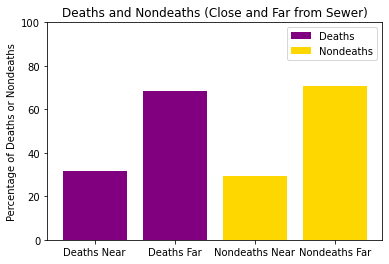

In [29]:
# Histogram

# Let's calculate the percentages of deaths that are 'close' versus 'far'. 
#    Close Deaths + Far Deaths should sum to 1! 
# (then we can do the same for non-graphs)
obs_near_sewer_deaths_pct = obs_near_sewer_deaths / (obs_near_sewer_deaths + obs_far_sewer_deaths) * 100
obs_far_sewer_deaths_pct = 100 - obs_near_sewer_deaths_pct

obs_near_sewer_nondeaths_pct = obs_near_sewer_nondeaths / (obs_near_sewer_nondeaths + obs_far_sewer_nondeaths) * 100
obs_far_sewer_nondeaths_pct = 100 - obs_near_sewer_nondeaths_pct



# 1. Let's first view the CLOSE deaths vs nondeaths. 
plt.bar(x=['Deaths Near', 'Deaths Far'], 
        height=[obs_near_sewer_deaths_pct, obs_far_sewer_deaths_pct], color='purple', label='Deaths')

# 2. Let's first view the FAR deaths vs nondeaths.
plt.bar(x=['Nondeaths Near', 'Nondeaths Far'], 
        height=[obs_near_sewer_nondeaths_pct, obs_far_sewer_nondeaths_pct], color='gold', label='Nondeaths')
plt.ylim((0,100))
plt.ylabel("Percentage of Deaths or Nondeaths")
plt.title("Deaths and Nondeaths (Close and Far from Sewer)")
plt.legend()

**Now we can do the same for comparing deaths and nondeaths of people near and far from the Broad St. Pump.**

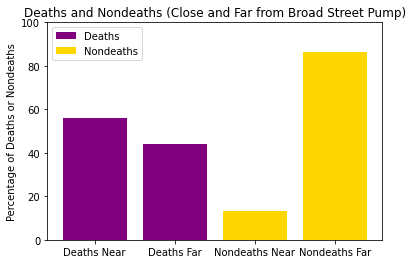

In [30]:
# Histogram

# Let's calculate the percentages of deaths that are 'close' versus 'far'. 
#    Close Deaths + Far Deaths should sum to 1! 
# (then we can do the same for non-graphs)
obs_near_pump_deaths_pct = obs_near_pump_deaths / (obs_near_pump_deaths + obs_far_pump_deaths) * 100
obs_far_pump_deaths_pct = 100 - obs_near_pump_deaths_pct

obs_near_pump_nondeaths_pct = obs_near_pump_nondeaths / (obs_near_pump_nondeaths + obs_far_pump_nondeaths) * 100
obs_far_pump_nondeaths_pct = 100 - obs_near_pump_nondeaths_pct



# 1. Let's first view the CLOSE deaths vs nondeaths. 
plt.bar(x=['Deaths Near', 'Deaths Far'], 
        height=[obs_near_pump_deaths_pct, obs_far_pump_deaths_pct], color='purple', label='Deaths')

# 2. Let's first view the FAR deaths vs nondeaths.
plt.bar(x=['Nondeaths Near', 'Nondeaths Far'], 
        height=[obs_near_pump_nondeaths_pct, obs_far_pump_nondeaths_pct], color='gold', label='Nondeaths')
plt.ylim((0,100))
plt.ylabel("Percentage of Deaths or Nondeaths")
plt.title("Deaths and Nondeaths (Close and Far from Broad Street Pump)")
plt.legend()

### The 3 Second Rule

The 3 Second Rule states that one gets 3 secons to grab someone's attention and flag the take-home point of a data visualization: https://stephanieevergreen.com/the-3-second-rule/

**What does these histograms communicate to you? Does they follow the 3 Second Rule?** 
